### Análise de MACD para Ação Selecionada

#### Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

#### Análise

In [2]:
dados = yf.Ticker('BBAS3.SA').history(start='2022-01-01', end='2022-12-31')

In [3]:
# preço = lista de valores com os preços;
# tamnho da janela (geralmente número de dias) para cálculo da Média Móvel Exponencial (MME)

def mme(preco, janela):
    # criar uma lista com vários 'NaN' seguidos da primeira média móvel simples
    preco_adaptado_pt1 = preco.rolling(janela).mean()[:janela]
    preco_adaptado_pt2 = preco[janela:]    # cria uma lista com os valores restantes
    preco_adaptado = pd.concat([preco_adaptado_pt1, preco_adaptado_pt2])
    
    return preco_adaptado.ewm(span=janela, adjust=False).mean()   # retorna a média móvel exponencial

In [4]:
def macd(preco):
    mme12 = mme(preco, 12)
    mme26 = mme(preco, 26)
    
    macd = mme12 - mme26
    linha_sinal = mme(macd, 9)
    histograma = macd - linha_sinal
    
    return macd, linha_sinal, histograma

In [5]:
dados['MACD'], dados['Linha de Sinal'], dados['Histograma MACD'] = macd(dados['Close'])

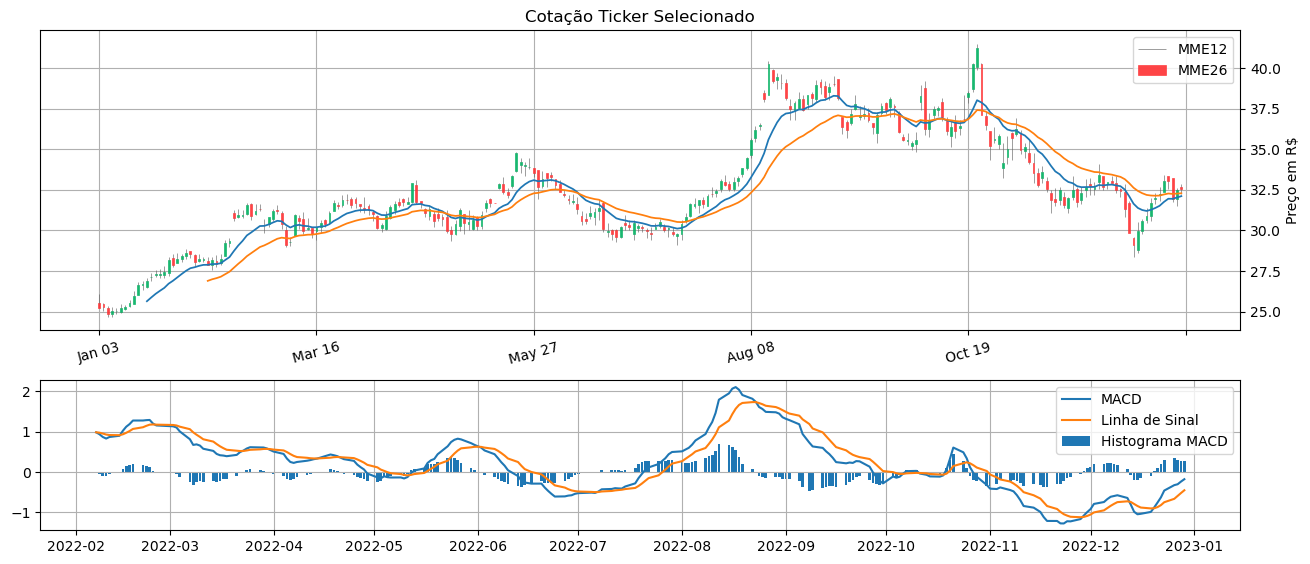

In [6]:
plt.style.use('default')
fig = plt.figure(figsize=(12,5))

grafico_candle = fig.add_axes((0, 0.40, 1, 0.60))
grafico_macd = fig.add_axes((0, 0, 1, 0.30))

# plot do gráfico de candles dos preços
mme12 = mpf.make_addplot(mme(dados['Close'], 12), ax=grafico_candle)
mme26 = mpf.make_addplot(mme(dados['Close'], 26), ax=grafico_candle)
mpf.plot(dados, type='candle', 
         style='yahoo',
         ax=grafico_candle,
         addplot=[mme12, mme26], 
         axtitle='Cotação Ticker Selecionado', 
         ylabel='Preço em R$', 
         xrotation=15)
grafico_candle.grid(True)
grafico_candle.legend(['MME12', 'MME26']);

# plot do gráfico do MACD
grafico_macd.plot(dados.index, dados['MACD'], label='MACD')
grafico_macd.plot(dados.index, dados['Linha de Sinal'], label='Linha de Sinal')
grafico_macd.bar(dados.index, dados['Histograma MACD'], label='Histograma MACD')
grafico_macd.legend(loc='best')
grafico_macd.grid(True)

plt.show()